In [290]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [291]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2008.xlsx")

In [292]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,20985,2008,3169,Adrian Griffin,NaN,SG,33,9,NBA,CHI,22,2,222,24,60,0.400,0,0,NaN,24,60,0.400,0.400,3,7,0.429,19,18,37,22,12,1,16,19,51
1,20993,2008,2967,Allen Iverson,NaN,SG,32,12,NBA,DEN,82,82,3424,712,1556,0.458,95,275,0.345,617,1281,0.482,0.488,645,797,0.809,47,196,243,586,160,12,245,109,2164
2,21016,2008,3038,Anthony Parker,NaN,SG,32,5,NBA,TOR,82,82,2634,395,829,0.476,133,304,0.438,262,525,0.499,0.557,102,125,0.816,50,284,334,183,79,17,87,157,1025
3,21018,2008,3577,Antoine Wright,NaN,SG,23,3,NBA,TOT,56,10,1232,136,329,0.413,32,110,0.291,104,219,0.475,0.462,46,67,0.687,40,107,147,80,28,21,50,127,350
4,21019,2008,3577,Antoine Wright,NaN,SG,23,3,NBA,NJN,41,10,1056,115,287,0.401,27,101,0.267,88,186,0.473,0.448,41,58,0.707,35,90,125,67,26,17,39,105,298


In [293]:
pd.set_option('display.max_columns', None)

In [294]:
print(data)

     seas_id  season  player_id            player  birth_year pos  age  \
0      20985    2008       3169    Adrian Griffin         NaN  SG   33   
1      20993    2008       2967     Allen Iverson         NaN  SG   32   
2      21016    2008       3038    Anthony Parker         NaN  SG   32   
3      21018    2008       3577    Antoine Wright         NaN  SG   23   
4      21019    2008       3577    Antoine Wright         NaN  SG   23   
..       ...     ...        ...               ...         ...  ..  ...   
111    21557    2008       3647         Von Wafer         NaN  SG   22   
112    21558    2008       3647         Von Wafer         NaN  SG   22   
113    21559    2008       3647         Von Wafer         NaN  SG   22   
114    21566    2008       3492      Willie Green         NaN  SG   26   
115    21568    2008       3730  Yakhouba Diawara         NaN  SG   25   

     experience   lg   tm   g  gs    mp   fg   fga  fg_percent  x3p  x3pa  \
0             9  NBA  CHI  22   2 

In [295]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


# Keep only the specified columns for a point guard
filtered_df_pg = data[pg_columns_to_keep]

# Display the resulting DataFrame
print(filtered_df_pg)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      51    0   12   19   22   37    1   2         0.400       0.400   
1    2164   95  160   47  586  243   12  82         0.488       0.458   
2    1025  133   79   50  183  334   17  82         0.557       0.476   
3     350   32   28   40   80  147   21  10         0.462       0.413   
4     298   27   26   35   67  125   17  10         0.448       0.401   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
111    46    4    2    1    7   19    3   0         0.311       0.279   
112    27    1    2    1    5   10    1   0         0.276       0.263   
113    19    3    0    0    2    9    2   0         0.370       0.304   
114   921   51   54   32  151  182   22  74         0.465       0.436   
115   153   21    8   23   37   62    3  14         0.489       0.410   

     x3p_percent  
0            NaN  
1          0.345  
2          0.438  
3          0.291  
4          0.267  
..       

In [296]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

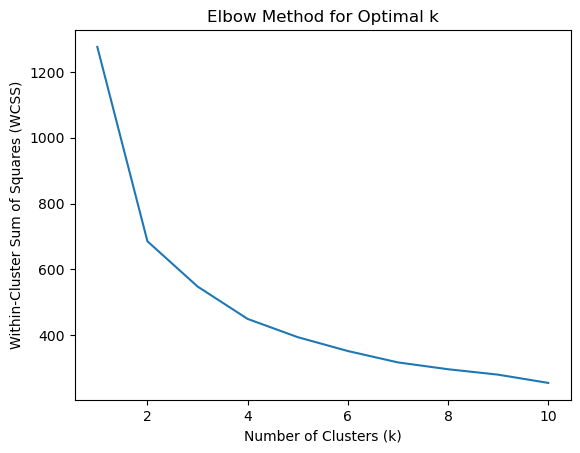

In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming 'filtered_df_pg_placeholder' is your preprocessed DataFrame

# Impute any remaining missing values (if any)
imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)

# Standardize the data
scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)

# Use the Elbow Method to determine the optimal number of clusters (k)
wcss = []  # Within-Cluster Sum of Squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [298]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      51    0   12   19   22   37    1   2         0.400       0.400   
1    2164   95  160   47  586  243   12  82         0.488       0.458   
2    1025  133   79   50  183  334   17  82         0.557       0.476   
3     350   32   28   40   80  147   21  10         0.462       0.413   
4     298   27   26   35   67  125   17  10         0.448       0.401   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
111    46    4    2    1    7   19    3   0         0.311       0.279   
112    27    1    2    1    5   10    1   0         0.276       0.263   
113    19    3    0    0    2    9    2   0         0.370       0.304   
114   921   51   54   32  151  182   22  74         0.465       0.436   
115   153   21    8   23   37   62    3  14         0.489       0.410   

     x3p_percent  Cluster  
0         -1.000        3  
1          0.345        0  
2          0.438        0  
3          

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


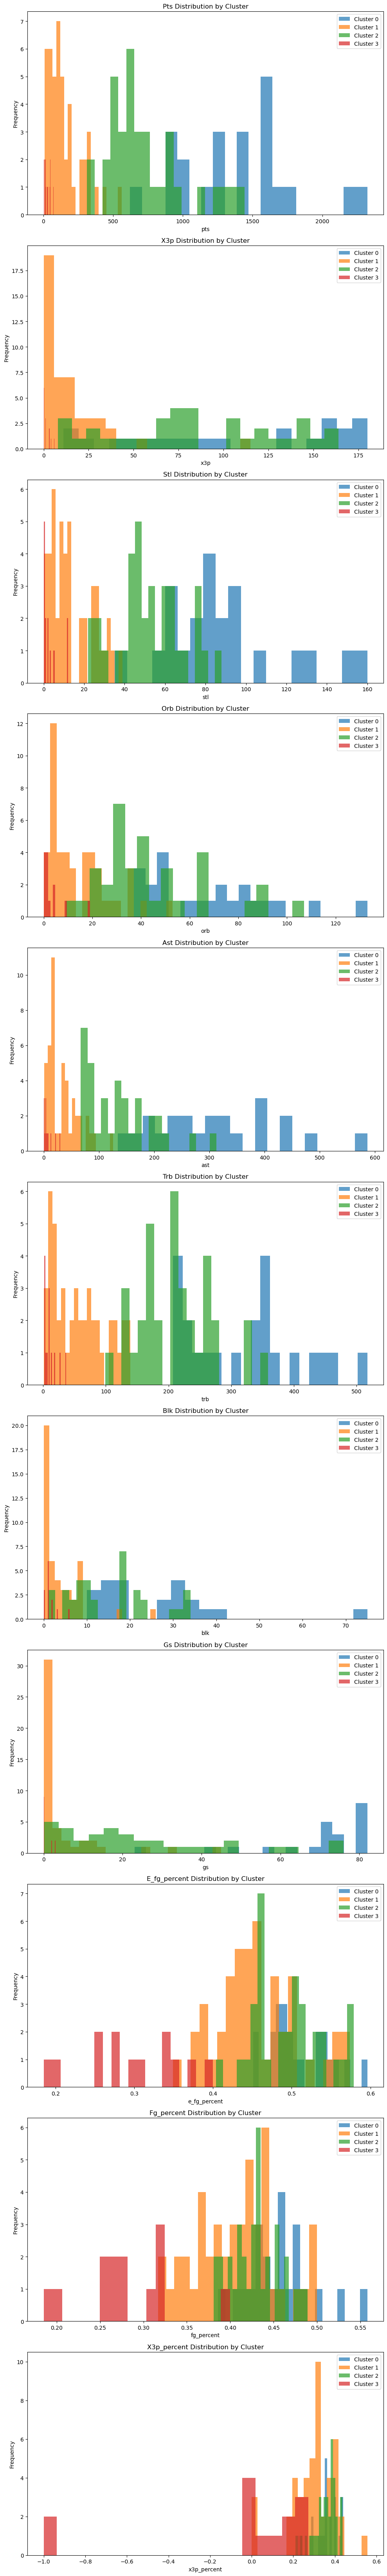

In [299]:
import matplotlib.pyplot as plt

# Features to plot
features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']

# Set up subplots
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 6 * len(features_to_plot)))

# Plot each feature for each cluster
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
        # Select data for the current cluster
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        
        # Plot the feature for the current cluster
        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')

    # Set labels and title for each subplot
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')

# Adjust layout
plt.tight_layout()
plt.show()
